<a href="https://colab.research.google.com/github/riccricc91/CNN/blob/master/MobileNetFlowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  print(tf.__version__)
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
#Import the library
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv2D, 
                                     MaxPooling2D, Dropout, BatchNormalization)
import numpy as np
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
#Upload the dataset from GoogleDrive
#The sataset is available in https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Define the directory from GoogleDrive for the dataset

directory_dataset = '/content/drive/My Drive/PythonRicc/dataset/flowers'

daisy_dir     = os.path.join('/content/drive/My Drive/PythonRicc/dataset/flowers/daisy')
dandelion_dir = os.path.join('/content/drive/My Drive/PythonRicc/dataset/flowers/dandelion')

rose_dir      = os.path.join('/content/drive/My Drive/PythonRicc/dataset/flowers/rose')
tulip_dir     = os.path.join('/content/drive/My Drive/PythonRicc/dataset/flowers/tulip')
sunflower_dir = os.path.join('/content/drive/My Drive/PythonRicc/dataset/flowers/sunflower')

In [0]:
dandelion_dir_name = os.listdir(dandelion_dir)
print(dandelion_dir_name[:10])
print('total training dandelion images:', len(os.listdir(dandelion_dir)))

daisy_dir_names = os.listdir(daisy_dir)
print(daisy_dir_names[:10])
print('total training daisy images:', len(os.listdir(daisy_dir)))

rose_dir_names = os.listdir(rose_dir)
print(rose_dir_names[:10])
print('total training rose images:', len(os.listdir(rose_dir)))

tulip_dir_names = os.listdir(tulip_dir)
print(tulip_dir_names[:10])
print('total training tulip images:', len(os.listdir(tulip_dir)))

sunflower_dir_names = os.listdir(sunflower_dir)
print(sunflower_dir_names[:10])
print('total training sunflower images:', len(os.listdir(sunflower_dir)))

['4562516418_8ccb8c103f.jpg', 'flickr.py', '17075803866_aeeded2637.jpg', '5605502523_05acb00ae7_n.jpg', '3419166382_a5e4b8fe6d_m.jpg', '2457473644_5242844e52_m.jpg', '34571238031_7eff74ca43_n.jpg', '7291185504_b740bbeba4_m.jpg', '5628296138_9031791fab.jpg', '34578947551_863af3acb3_n.jpg']
total training dandelion images: 1046
['5512287917_9f5d3f0f98_n.jpg', '476857510_d2b30175de_n.jpg', '14167534527_781ceb1b7a_n.jpg', '521762040_f26f2e08dd.jpg', '34638378196_216d5bbc2e_n.jpg', '7320089276_87b544e341.jpg', '33837577463_1ae52a3726_n.jpg', '34718882165_68cdc9def9_n.jpg', '8008258043_5457dd254b_n.jpg', '8719756744_34a5a83976_n.jpg']
total training daisy images: 762
['4860145119_b1c3cbaa4e_n.jpg', '16209331331_343c899d38.jpg', '5777669976_a205f61e5b.jpg', '18302701228_2b5790b199_n.jpg', '5001848317_b33d17ab7a_n.jpg', '15011625580_7974c44bce.jpg', '8983268106_dc913d17d8_m.jpg', '17953368844_be3d18cf30_m.jpg', '14267691818_301aceda07.jpg', '5001846495_56068de2da_n.jpg']
total training rose im

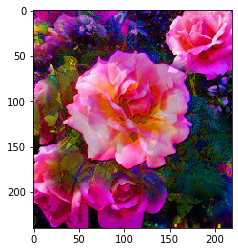

In [0]:
#Show the dataset (rose image)
img_path = os.path.join(rose_dir, rose_dir_names[10]) 
img = mpimg.imread(img_path)
plt.imshow(img)

In [0]:
#Preprocessing and rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1/255)
#test_datagen = ImageDataGenerator(rescale=1/255)

train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory_dataset, target_size=(224, 224), batch_size=128,  class_mode='categorical')

Found 4276 images belonging to 5 classes.


In [0]:
import tensorflow_hub as hub

In [0]:
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" 

In [0]:
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url, input_shape=(224, 224, 3))

In [0]:
MobileNet_feature_extractor_layer.trainable = False

In [0]:
model = tf.keras.Sequential([
  MobileNet_feature_extractor_layer,
  tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
model.input

<tf.Tensor 'keras_layer_input:0' shape=(None, 224, 224, 3) dtype=float32>

In [0]:
model.output

<tf.Tensor 'dense/Identity:0' shape=(None, 5) dtype=float32>

In [0]:
history = model.fit_generator(train_generator, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 34 steps
Epoch 1/5
34/34 [==============================] - 1427s 42s/step - loss: 0.9322 - accuracy: 0.6618
Epoch 2/5
34/34 [==============================] - 185s 5s/step - loss: 0.5729 - accuracy: 0.7996
Epoch 3/5
34/34 [==============================] - 183s 5s/step - loss: 0.4719 - accuracy: 0.8375
Epoch 4/5
34/34 [==============================] - 184s 5s/step - loss: 0.4270 - accuracy: 0.8517
Epoch 5/5
34/34 [==============================] - 184s 5s/step - loss: 0.3839 - accuracy: 0.8700


In [0]:
my_model = "flowers_mobilenet"

In [0]:
tf.saved_model.save(model, my_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: flowers_mobilenet/assets


INFO:tensorflow:Assets written to: flowers_mobilenet/assets


In [0]:
converter = tf.lite.TFLiteConverter.from_saved_model(my_model)

In [0]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [0]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [0]:
labels = ['daisy', 'dandelion', 'rose','tulip','sunflower']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))

In [0]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

In [0]:
try:
    files.download('flowers_mobilenet.zip')
except:
    pass